The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [1]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [7]:
nobel=pd.read_csv('nobel.csv')

## 1- The most commonly awarded gender and birth country

In [8]:
top_gender = nobel['sex'].value_counts(sort=True)
top_gender = top_gender.index[0]
print(top_gender)

top_country = nobel['birth_country'].value_counts(sort=True)
top_country = top_country.index[0]
print(top_country)

Male
United States of America


## 2- Decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories

2000


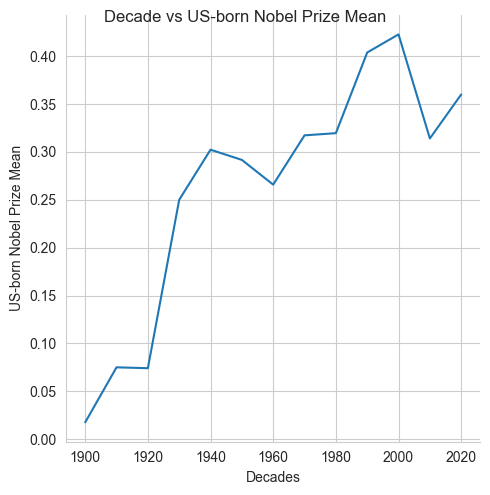

In [9]:
# Analysis
nobel['usa_winner'] = nobel['birth_country'] == 'United States of America'
nobel['decade'] = np.floor(nobel['year']/10) * 10

decade_group = nobel.groupby('decade', as_index=False)['usa_winner'].mean()

max_decade_usa = decade_group[decade_group['usa_winner'] == decade_group['usa_winner'].max()]
max_decade_usa = int(max_decade_usa.iloc[0,0])
print(max_decade_usa)

# Visualization
sns.set_style('whitegrid')
g = sns.relplot(x='decade', y='usa_winner', data=decade_group, kind='line')
g.fig.suptitle('Decade vs US-born Nobel Prize Mean')
g.set(xlabel='Decades', ylabel='US-born Nobel Prize Mean')
plt.show()

## 3- The decade and Nobel Prize category combination had the highest proportion of female laureates

{2020: 'Literature'}


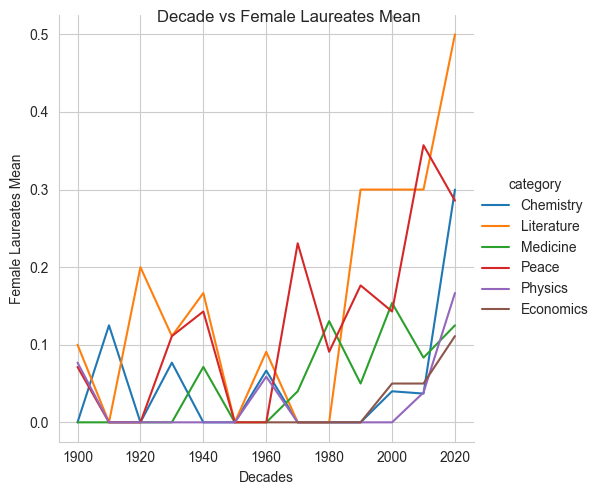

In [10]:
# Analysis
nobel['female_laureates'] = nobel['sex'] == 'Female'

decade_category_fem = nobel.groupby(['decade', 'category'], as_index = False)['female_laureates'].mean()

decade_category_fem_max = decade_category_fem['female_laureates'].max()

decade_category_fem_max = decade_category_fem[decade_category_fem['female_laureates'] == decade_category_fem_max]

max_female_dict = {int(decade_category_fem_max['decade'].iloc[0]): decade_category_fem_max['category'].iloc[0]}
print(max_female_dict)

# Visualization
g = sns.relplot(x='decade', y='female_laureates', data=decade_category_fem, kind='line', hue='category')
g.fig.suptitle('Decade vs Female Laureates Mean')
g.set(xlabel='Decades', ylabel='Female Laureates Mean')
plt.show()

## 4- The first woman to receive a Nobel Prize, and in what category

In [11]:
year_category_fem = nobel[nobel['female_laureates']]

year_category_fem_min = year_category_fem[year_category_fem['year'] == year_category_fem['year'].min()]

first_woman_name = year_category_fem.iloc[0,7]
first_woman_category = year_category_fem.iloc[0,1]
print(first_woman_name)
print(first_woman_category)

Marie Curie, née Sklodowska
Physics


## 5- The individuals or organizations have won more than one Nobel Prize throughout the years

In [12]:
names_repeat_count = nobel['full_name'].value_counts()
names_repeat_count = names_repeat_count[names_repeat_count >= 2].index

repeat_list = list(names_repeat_count)
repeat_list

['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Frederick Sanger',
 'Marie Curie, née Sklodowska',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)',
 'John Bardeen',
 'Linus Carl Pauling']